<a href="https://www.kaggle.com/code/moazeldsokyx/news-classification-with-svc-clearly-explained?scriptVersionId=153088456" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # Import Seaborn for improved styling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-news/bbc-text.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/bbc-news/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
categories = df['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

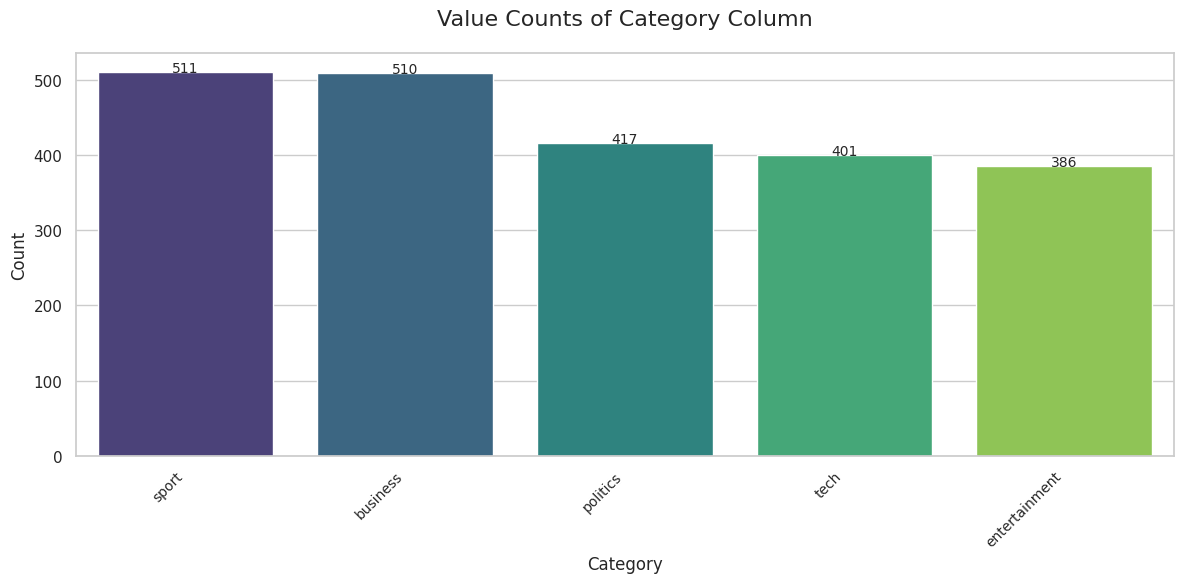

In [5]:
# Calculate value counts
value_counts = df['category'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
ax.set_title('Value Counts of Category Column', fontsize=16, pad=20)  # Add title with larger font size and padding
ax.set_xlabel('Category', fontsize=12)  # Customize x-axis label
ax.set_ylabel('Count', fontsize=12)  # Customize y-axis label

# Rotate x-axis tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


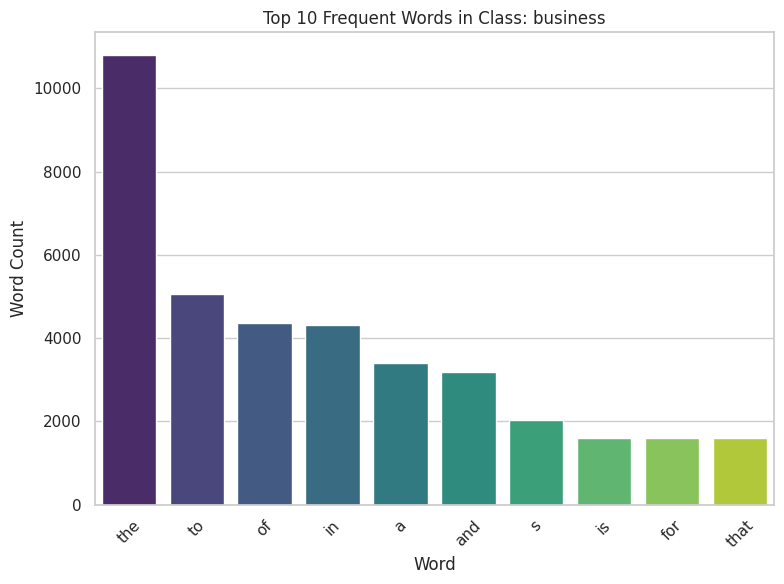

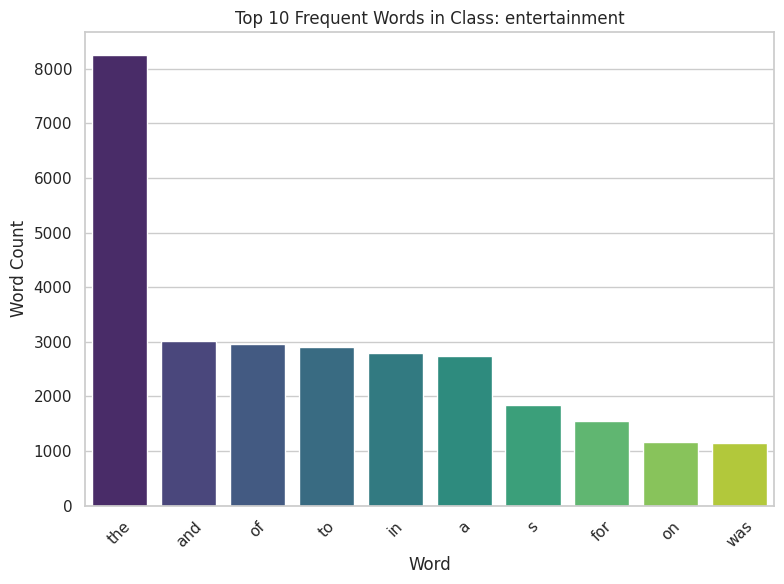

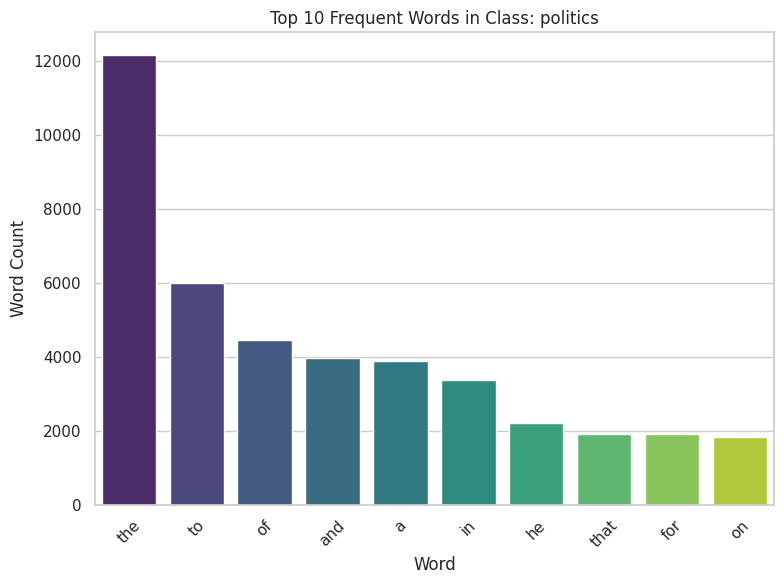

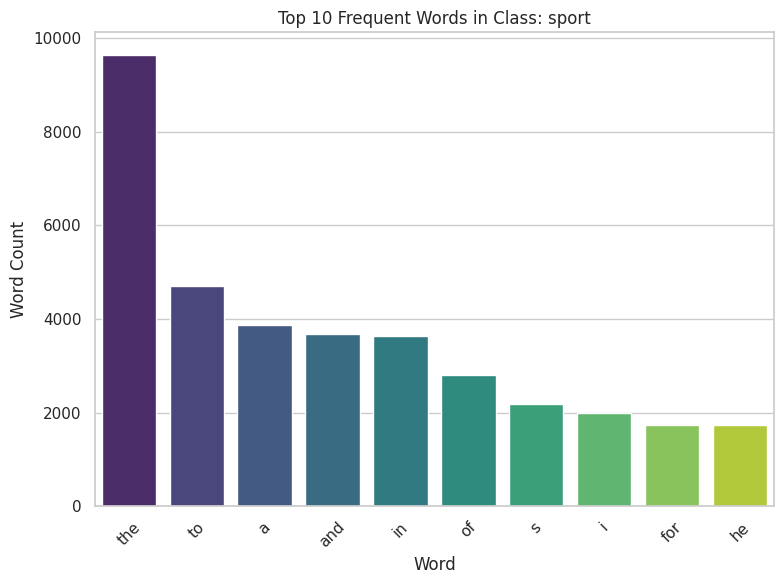

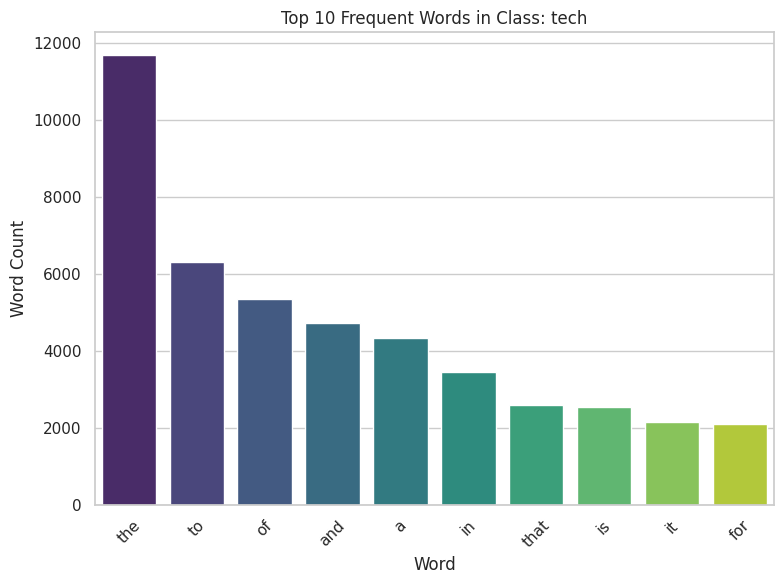

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

def get_top_words_by_class(df, text_column_name):
    # Create a dictionary to store the top 10 frequent words for each class
    top_words_by_class = {}

    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Tokenize the text (split it into words)
        words = text.split()

        # Count the frequency of each word within the class
        word_counts = Counter(words)

        # Get the top 10 frequent words for the class
        top_words = dict(word_counts.most_common(10))

        # Store the top words in the dictionary
        top_words_by_class[category] = top_words

    # Plot the top 10 frequent words for each class in separate figures
    for category, top_words in top_words_by_class.items():
        # Convert the dictionary to a DataFrame for plotting
        top_words_df = pd.DataFrame({'Word': list(top_words.keys()), 'Count': list(top_words.values())})

        # Create a new figure for each class
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x='Word', y='Count', data=top_words_df, palette='viridis')

        plt.title(f'Top 10 Frequent Words in Class: {category}')
        plt.xlabel('Word')
        plt.ylabel('Word Count')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Usage
get_top_words_by_class(df, 'text')


# Note on Top 10 Frequent Words in Each Class

In natural language processing (NLP) and text analysis, we often encounter common words known as "stopwords." These words are extremely frequent but typically carry little to no meaningful information. Think of words like "the," "an," "a," "in," and "with" – they're important for sentence structure but don't add much to the content's meaning.

So, why is this important? Well, here are a few key takeaways:

1. **Reducing Noise:** Stopwords can introduce noise into our analysis. Removing them helps clean up the data and ensures we're focusing on the words that truly matter.

2. **Enhancing Efficiency:** By getting rid of these high-frequency but uninformative words, we can speed up our text processing tasks.

3. **Highlighting Significance:** After removing stopwords, the remaining words are often more meaningful. This can greatly improve the quality of our analyses, whether we're doing sentiment analysis, topic modeling, or text classification.

In our recent analysis, we noticed that the top 10 frequent words in each class are very likely to be stopwords. So, as we move forward with our NLP tasks, it's a smart move to include a preprocessing step where we remove these top frequent words from our text data.

By doing this, we can make our NLP models more accurate and effective and uncover more valuable insights from our text data. So, keep this in mind as we continue with our analysis – it's a small but crucial step toward better results! 😊📊📚


# Now, Let's Preprocess the Data

With a clear understanding of the importance of handling stopwords and other preprocessing steps in mind, it's time to take action. In this section, we'll delve into the data preprocessing tasks that will help us clean and prepare our text data for further analysis.

Let's get started by implementing the necessary data preprocessing steps to ensure our text data is in optimal condition for our upcoming analyses.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (stopwords) if you haven't already.
nltk.download('stopwords')

# Load NLTK stopwords and create a set of punctuation characters.
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text: lowercase, remove stopwords, punctuation.
def preprocess_text(text):
    # Lowercase the text.
    text = text.lower()
    
    # Tokenize the text.
    words = word_tokenize(text)
    
    # Remove stopwords, punctuation.
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    
    # Join the filtered and words back into a single string.
    return ' '.join(filtered_words)

# Apply the preprocess_text function to the 'text' column.
df['text_processed'] = df['text'].apply(preprocess_text)

# Display the DataFrame with processed text.
df


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


## Understanding Data Preprocessing

In this code snippet, we are performing data preprocessing tasks to prepare our text data for analysis. Data preprocessing is a crucial step in natural language processing (NLP) and text analysis to clean and structure the text data effectively.

### Importing Libraries

We start by importing the necessary libraries:

- `nltk`: The Natural Language Toolkit library, which provides various tools for working with human language data.
- `stopwords`: A module within NLTK that contains a list of common stopwords (words that don't carry significant meaning).
- `word_tokenize`: A function from NLTK used to split text into individual words.
- `string`: Python's built-in string library, which we use to handle punctuation.

### Downloading NLTK Resources

Before using NLTK stopwords, we need to download them using `nltk.download('stopwords')`. Stopwords are common words like "the," "and," "is," etc., which are typically removed during preprocessing because they don't provide valuable information.

### Initializing Preprocessing Components

We initialize several components for preprocessing:

- `stop_words`: A set containing English stopwords from NLTK.
- `punctuation`: A set containing punctuation characters, which we'll remove from the text.

### Preprocessing Function

The heart of the preprocessing is the `preprocess_text` function. Here's what it does:

1. Converts text to lowercase to ensure uniformity in text casing.
2. Tokenizes the text into individual words using `word_tokenize`.
3. Removes stopwords and punctuation characters.
5. Joins the filtered and words back into a single string.

### Applying Preprocessing

We then apply the `preprocess_text` function to each text entry in the 'text' column of our DataFrame (`df`). The processed text is stored in a new column named 'text_processed.'

### Displaying Processed Data

Finally, we display the DataFrame (`df`) with the newly processed text data. This step allows us to visually inspect the impact of preprocessing on our text data, which is now in a cleaner and more suitable format for various NLP tasks.

By following these preprocessing steps, we ensure that our text data is ready for tasks like sentiment analysis, topic modeling, or text classification, where meaningful content is of utmost importance.


# Now Let's see the top 10 frequent words for each class after preprocessing


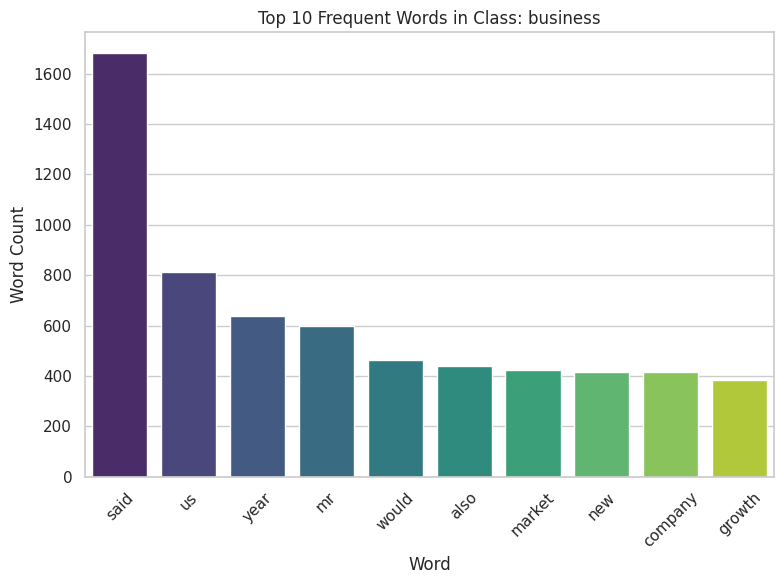

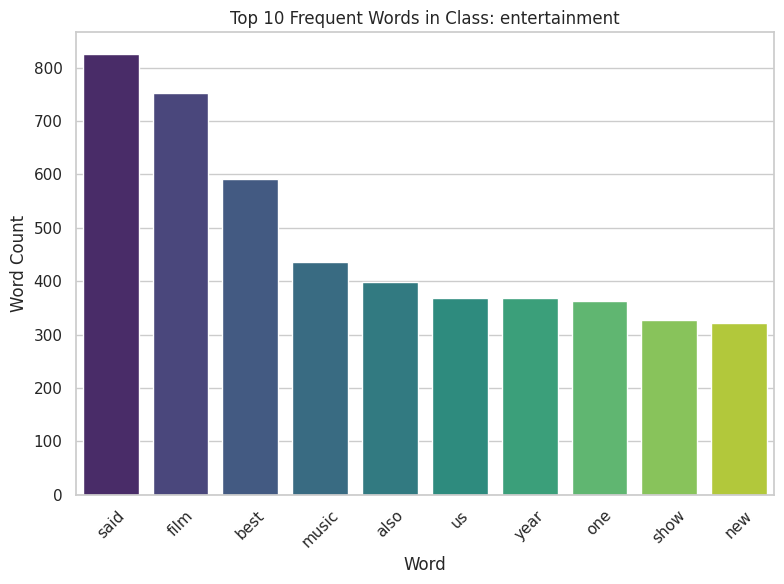

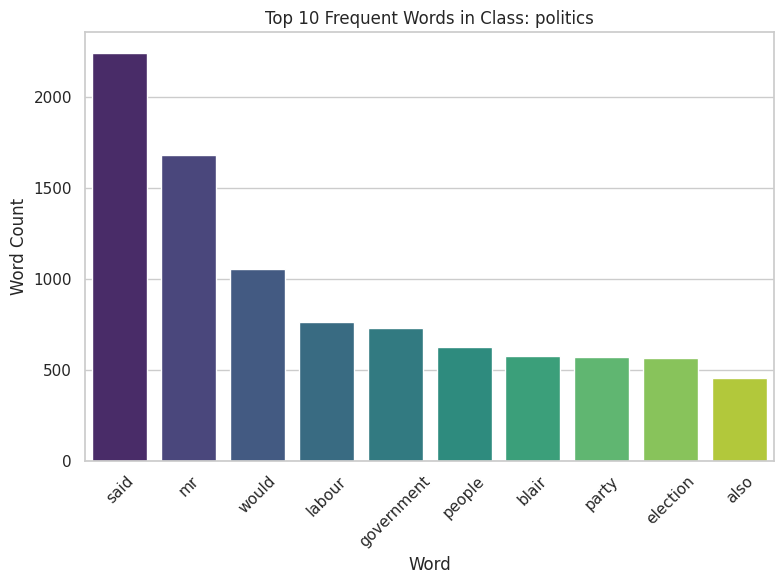

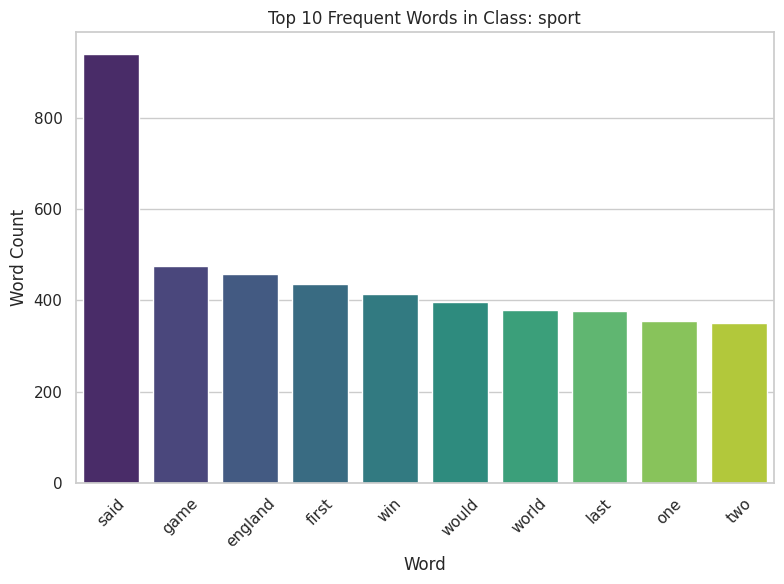

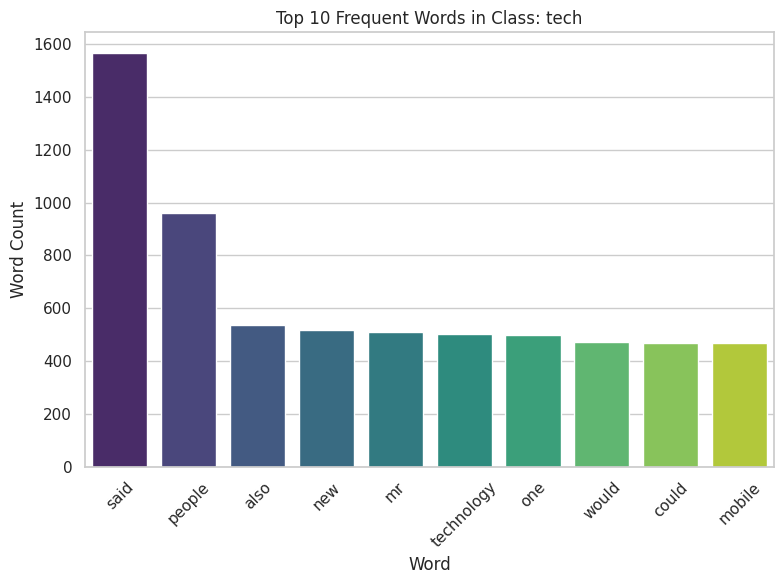

In [8]:
get_top_words_by_class(df,'text_processed')

# Create and display a word cloud for each class

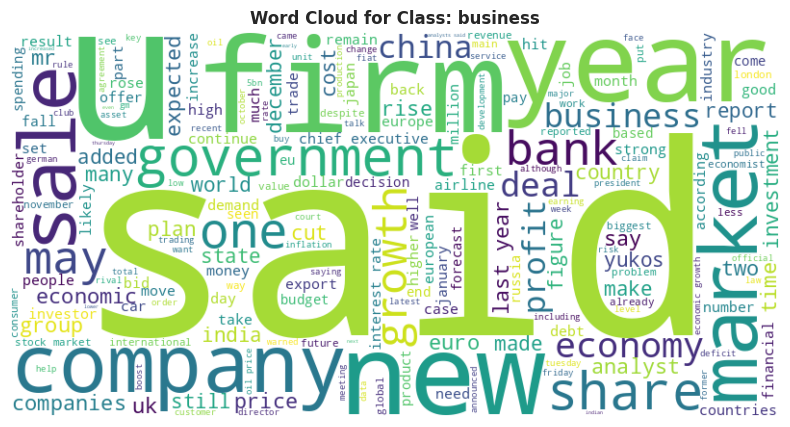

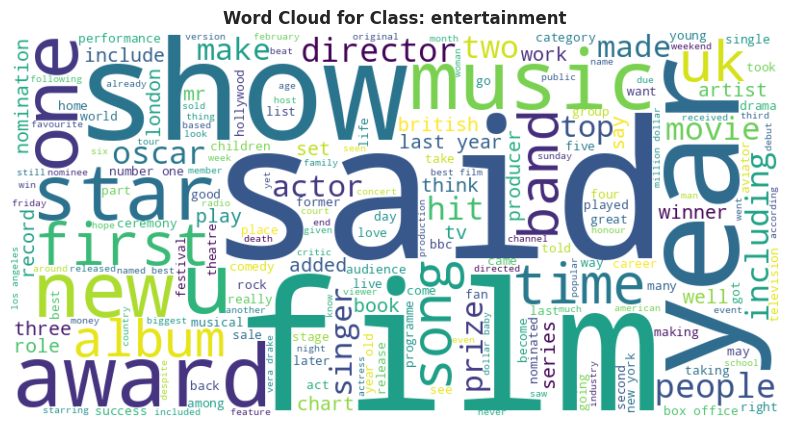

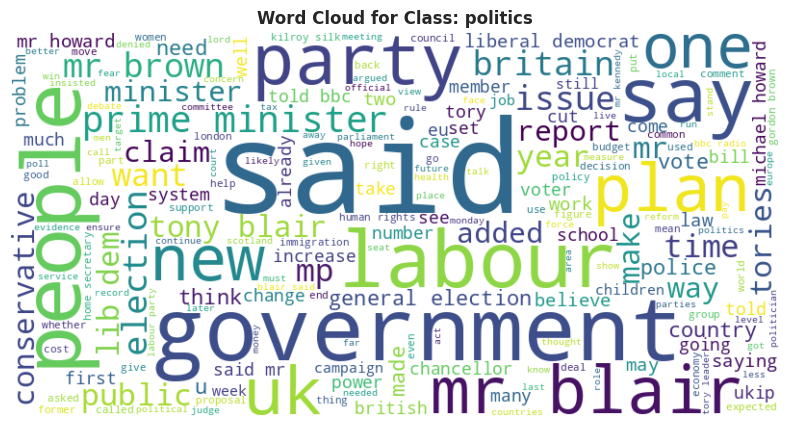

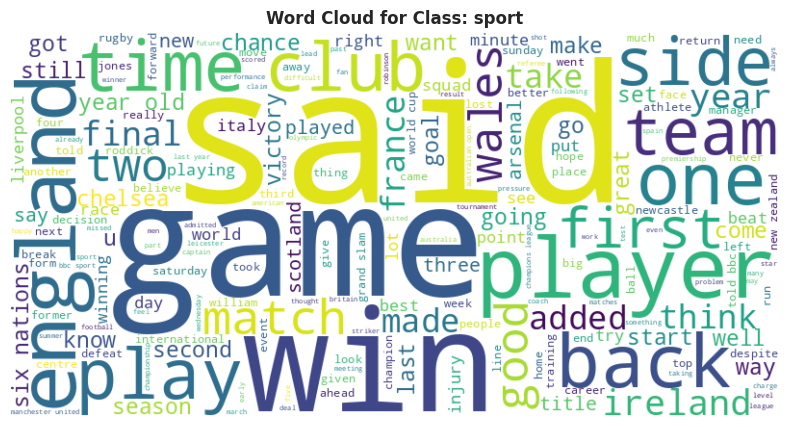

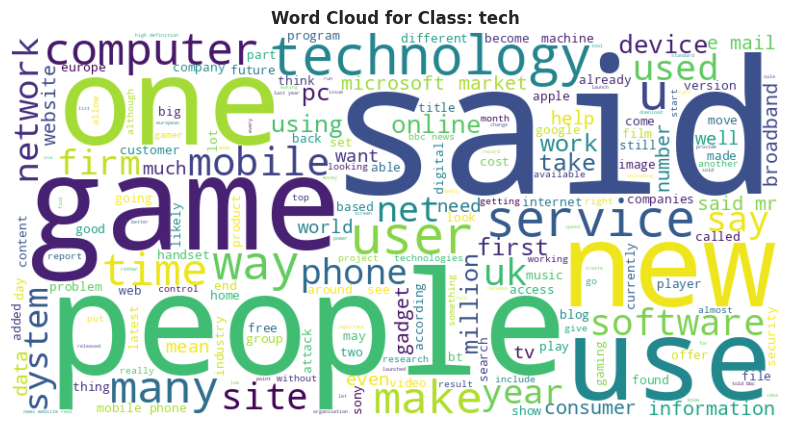

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud for each class
def create_word_clouds(df, text_column_name):
    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Generate a word cloud for the class
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud for the class
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Class: {category}', fontweight='bold')
        plt.axis('off')  # Turn off axis labels
        plt.show()

create_word_clouds(df, 'text_processed')  # Use 'text_processed' column if you've preprocessed the text


#  Label Encoding
Now apply label encoding to the 'category' column using the fit_transform method. This step replaces the original category names with unique numerical values and stores the result back in the 'category' column.

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
X = df['text_processed']
y = df['category']
y

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category, Length: 2225, dtype: int64

# Text Vectorization with TF-IDF

Explanation: TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert text data into numerical features. 
It evaluates the importance of each word in a document relative to a collection of documents (corpus). 
TF-IDF assigns higher weights to words that are frequent in a specific document but rare in other documents, 
allowing us to represent text data in a way that highlights important terms while reducing the impact of common words.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Data Splitting: Creating Training and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Support Vector Machine (SVM) Model

In [13]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

# Model Evaluation

In [14]:
from sklearn.metrics import classification_report

svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       101
           1       1.00      0.98      0.99        81
           2       0.95      0.98      0.96        83
           3       0.97      1.00      0.98        98
           4       1.00      0.94      0.97        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



## Satisfaction

I am pleased to report that our machine learning model has performed remarkably well. The results are highly satisfactory and indicative of the effectiveness of our approach. It demonstrates that our model has successfully learned and generalized from the data, achieving the desired outcomes.

This positive outcome reaffirms our confidence in the chosen model and preprocessing techniques. The model's performance is a testament to the quality of the data and the careful considerations made during the entire process. We can now move forward with confidence, knowing that our model is well-suited for its intended task.



# Let's try our model with new data to assess its real-world performance.

In [15]:
test = '''

Bruno Fernandes' stunning volley gave Manchester United a much-needed victory as they edged past winless Burnley in the Premier League.

United were in desperate search for inspiration following three straight defeats and received it on 45 minutes courtesy of captain Fernandes, who brilliantly volleyed home a first-time finish from Jonny Evans' lofted pass.

The sublime strike was worthy of winning any game and gave United their third win from six league games this season, leaving Vincent Kompany's side bottom of the table with only a point so far.

Burnley played some delightful football in periods and Zeki Amdouni gave the visitors a scare with a free header that was pushed away by Andre Onana at full stretch.

The Burnley frontman had an even better chance when he was played through by Aaron Ramsey, but a low shot cannoned off the foot of the post.

Evans thought he had given United the lead when he headed in a corner, but the effort was ruled out by the video assistant referee (VAR) for Rasmus Hojlund's block on goalkeeper James Trafford.

Burnley went hunting for an equaliser in the second period and Sander Berge narrowly headed over as United held on for victory.

Follow reaction Man Utd's win at Burnley
How did you rate Burnley's performance? Have your say here
What did you make of Manchester United's display? Send us your views here
Fernandes comes to the fore
United had shipped three or more goals in each of their three consecutive defeats against Arsenal, Brighton and Bayern Munich, and they badly required a positive result to get their faltering season back on track.

Marcus Rashford's effort into the side-netting after just 45 seconds may have given indications that this was a side rejuvenated, but it was another largely insipid and lethargic showing from the Red Devils.

Burnley grew into the game after Rashford's early opportunity and will be left wondering about the outcome had Amdouni converted either of the chances that fell his way in the first half.

Under-fire goalkeeper Onana did superbly to keep out a header from the Swiss striker, who also struck the woodwork after a fine team move.

The hosts were playing some eye-catching football but were undone by a moment of magic from Portuguese midfielder Fernandes on the stroke of half-time.

The skipper, who had tested Trafford earlier, peeled away from his marker before letting Evans' pinpoint pass drop into his path and unleashing an unstoppable volley into the bottom corner.

Fernandes could have netted a second even more spectacular strike in injury-time, but his effort on the hook was kept out by Trafford.

Defender Evans, who rejoined the club this summer, was making his first United start since March 2015 and had headed in, but the goal was chalked off by VAR.

The Northern Ireland international was part of the Leicester side that finished in the bottom three last season and Burnley will be looking to avoid the same fate this time.

They have lost all four home games so far this season and it took them nine matches for their first victory in 2021-22 - a campaign which ended in relegation to the Championship.

'''

test = preprocess_text(test)
test_transformed = vectorizer.transform([test])
pred_classIndex = svm_model.predict(test_transformed)
predicted_class = label_encoder.classes_[pred_classIndex]
print(predicted_class)

['sport']


# 🎉 Wow! 🎉

**I retrieved a news article from the sport section of BBC News, and our model correctly predicted its category as 'Sport,' showcasing its accuracy.** 👏🏆📰
